In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import NASNetMobile 

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, Callback



In [ ]:
#Declaring the MobileNetV2 Model
pre_trained_model = MobileNetV2(input_shape = (224, 224, 3), 
                                include_top = False)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
#pre_trained_model.summary()

#last_layer = pre_trained_model.get_layer('out_relu')
#print('last layer output shape: ', last_layer.output_shape)
#last_output = last_layer.output

inputs = layers.Input((224,224,3))

x = pre_trained_model(inputs)
#x = layers.AveragePooling2D((7,7))(last_output)
x = layers.AveragePooling2D((7,7))(x)
x = layers.Flatten()(x)#(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)                  
x = layers.Dense (2, activation='softmax')(x)           

#model = Model( inputs = pre_trained_model.input, outputs =  x) 
model = Model( inputs = inputs, outputs =  x)

INITIAL_LR =0.0001
EPOCHS = 20

model.compile(optimizer = Adam(lr=0.0001, decay= INITIAL_LR/EPOCHS), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
#Declaring the NASNetMobile Model

inputs = layers.Input((224, 224, 3))
pre_trained_model2 = NASNetMobile(include_top=False, input_shape=(224, 224, 3))
x = pre_trained_model2(inputs)
out1 = layers.GlobalMaxPooling2D()(x)
out2 = layers.GlobalAveragePooling2D()(x)
out3 = layers.Flatten()(x)
out = layers.Concatenate(axis=-1)([out1, out2, out3])
out = layers.Dropout(0.5)(out)
out = layers.Dense(1, activation="sigmoid", name="3_")(out)

for layer in pre_trained_model2.layers:
  layer.trainable = False

model2 = Model( inputs = inputs, outputs =  out) 

INITIAL_LR =0.001
EPOCHS = 20

model2.compile(optimizer = Adam(lr=INITIAL_LR, decay= INITIAL_LR/EPOCHS), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

19996672/19993432 [==============================] - 0s 0us/step


In [ ]:

import zipfile

local_zip = '/content/drive/My Drive/Covid_Mask_Detector.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/Covid_Mask_Detector/data'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_mask_dir = os.path.join(train_dir, 'with_mask')
train_no_mask_dir = os.path.join(train_dir, 'without_mask') 
validation_mask_dir = os.path.join(validation_dir, 'with_mask')
validation_no_mask_dir = os.path.join(validation_dir, 'without_mask')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_mask_fnames = os.listdir(train_mask_dir)
train_no_mask_fnames = os.listdir(train_no_mask_dir)
train_mask_fnames = os.listdir(validation_mask_dir)
train_no_mak_fnames = os.listdir(validation_no_mask_dir)

batch_size = 20 

steps_per_epoch = len(train_mask_fnames) // batch_size
validation_steps = len(validation_no_mask_dir) // batch_size

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 1212 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:

history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 20,
            validation_steps = validation_steps,
            verbose = 2)

Epoch 1/20
5/5 - 35s - loss: 0.6969 - accuracy: 0.6100 - val_loss: 0.5328 - val_accuracy: 0.7750
Epoch 2/20
5/5 - 3s - loss: 0.4467 - accuracy: 0.9200 - val_loss: 0.4518 - val_accuracy: 0.9250
Epoch 3/20
5/5 - 3s - loss: 0.3538 - accuracy: 0.8900 - val_loss: 0.2886 - val_accuracy: 0.9750
Epoch 4/20
5/5 - 3s - loss: 0.2926 - accuracy: 0.9100 - val_loss: 0.2241 - val_accuracy: 1.0000
Epoch 5/20
5/5 - 3s - loss: 0.2214 - accuracy: 0.9200 - val_loss: 0.1892 - val_accuracy: 1.0000
Epoch 6/20
5/5 - 3s - loss: 0.2070 - accuracy: 0.9500 - val_loss: 0.1731 - val_accuracy: 0.9750
Epoch 7/20
5/5 - 3s - loss: 0.2047 - accuracy: 0.9400 - val_loss: 0.1675 - val_accuracy: 0.9750
Epoch 8/20
5/5 - 3s - loss: 0.1567 - accuracy: 0.9800 - val_loss: 0.1367 - val_accuracy: 0.9750
Epoch 9/20
5/5 - 3s - loss: 0.1628 - accuracy: 0.9700 - val_loss: 0.1877 - val_accuracy: 0.9750
Epoch 10/20
5/5 - 3s - loss: 0.1103 - accuracy: 0.9800 - val_loss: 0.0832 - val_accuracy: 1.0000
Epoch 11/20
5/5 - 3s - loss: 0.0857 - 

In [ ]:
train_generator2 = train_datagen.flow_from_directory(train_dir,
                                                    class_mode = 'binary', 
                                                    batch_size= batch_size,
                                                    target_size = (224, 224))     

validation_generator2 =  test_datagen.flow_from_directory( validation_dir,
                                                          class_mode  = 'binary',
                                                          batch_size= batch_size, 
                                                          target_size = (224, 224))

Found 1212 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
history = model2.fit(
            train_generator2,
            validation_data = validation_generator2,
            steps_per_epoch = steps_per_epoch,
            epochs = 20,
            validation_steps = validation_steps,
            verbose = 2)

Epoch 1/20
5/5 - 3s - loss: 0.0212 - accuracy: 0.9900 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/20
5/5 - 3s - loss: 0.5861 - accuracy: 0.9200 - val_loss: 0.0610 - val_accuracy: 0.9750
Epoch 3/20
5/5 - 3s - loss: 0.5690 - accuracy: 0.9400 - val_loss: 0.5021 - val_accuracy: 0.9500
Epoch 4/20
5/5 - 3s - loss: 0.3023 - accuracy: 0.9700 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 5/20
5/5 - 3s - loss: 0.2343 - accuracy: 0.9500 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 6/20
5/5 - 3s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 8.8617e-04 - val_accuracy: 1.0000
Epoch 7/20
5/5 - 3s - loss: 0.0600 - accuracy: 0.9900 - val_loss: 0.5276 - val_accuracy: 0.9750
Epoch 8/20
5/5 - 3s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 1.8571e-04 - val_accuracy: 1.0000
Epoch 9/20
5/5 - 3s - loss: 0.2542 - accuracy: 0.9700 - val_loss: 0.6193 - val_accuracy: 0.9000
Epoch 10/20
5/5 - 3s - loss: 0.1170 - accuracy: 0.9500 - val_loss: 3.2815e-04 - val_accuracy: 1.0000
Epoch 11/20
5/5 - 3s - loss

In [ ]:
import numpy as np
fnames = train_generator2.filenames
y_pred = model2.predict_generator(train_generator2)
errors = np.where(y_pred != train_generator2.classes)[0]
for i in errors:
    print(fnames[i])

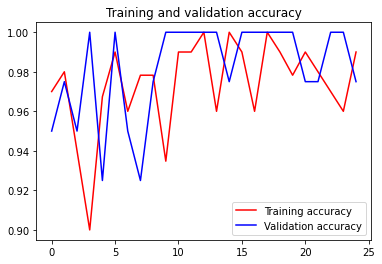

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plotting accuracy change in the models
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
#For final model selection and storage
epochs = 30
model2 = Model( inputs = inputs, outputs =  out) 

INITIAL_LR =0.001
EPOCHS = 20

model2.compile(optimizer = Adam(lr=INITIAL_LR), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights_NAS.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [ checkpoint, reduce_lr]

history = model2.fit(
    x=train_generator2,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator2,
    validation_steps = validation_steps,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/30

Epoch 00001: saving model to model_weights_NAS.h5
60/60 - 34s - loss: 0.2150 - accuracy: 0.9614 - val_loss: 0.1171 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 2/30

Epoch 00002: saving model to model_weights_NAS.h5
60/60 - 30s - loss: 0.1608 - accuracy: 0.9723 - val_loss: 0.1555 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 3/30

Epoch 00003: saving model to model_weights_NAS.h5
60/60 - 30s - loss: 0.1523 - accuracy: 0.9765 - val_loss: 0.1288 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 4/30

Epoch 00004: saving model to model_weights_NAS.h5
60/60 - 29s - loss: 0.0746 - accuracy: 0.9841 - val_loss: 0.1287 - val_accuracy: 0.9800 - lr: 1.0000e-04
Epoch 5/30

Epoch 00005: saving model to model_weights_NAS.h5
60/60 - 29s - loss: 0.1080 - accuracy: 0.9807 - val_loss: 0.1474 - val_accuracy: 0.9800 - lr: 1.0000e-04
Epoch 6/30

Epoch 00006: saving model to model_weights_NAS.h5
60/60 - 29s - loss: 0.1096 - accuracy: 0.9815 - val_loss: 0.1333 - val_accuracy: 0.9800 - lr: 1.0000e-05
Epoch 7/30

In [ ]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss')<=0.02 and logs.get('val_loss') <=0.02:
      print("\nReached 100% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
INITIAL_LR =0.001
EPOCHS = 500

model.compile(optimizer = Adam(lr=INITIAL_LR), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
checkpoint = ModelCheckpoint("/content/drive/My Drive/model_weights_Mobile.h5", monitor='val_loss',
                             save_weights_only=True, mode='auto', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=1e-50, mode='auto')
callbacks = [ checkpoint, reduce_lr]
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = EPOCHS,
            validation_steps = validation_steps,
            callbacks=callbacks,
            verbose = 2)

Epoch 1/500

Epoch 00001: saving model to /content/drive/My Drive/model_weights_Mobile.h5
5/5 - 5s - loss: 0.6474 - accuracy: 0.7300 - val_loss: 0.1027 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 2/500

Epoch 00002: saving model to /content/drive/My Drive/model_weights_Mobile.h5
5/5 - 4s - loss: 0.2541 - accuracy: 0.9100 - val_loss: 0.1722 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 3/500

Epoch 00003: saving model to /content/drive/My Drive/model_weights_Mobile.h5
5/5 - 4s - loss: 0.1563 - accuracy: 0.9500 - val_loss: 0.1069 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 4/500

Epoch 00004: saving model to /content/drive/My Drive/model_weights_Mobile.h5
5/5 - 3s - loss: 0.1801 - accuracy: 0.9457 - val_loss: 0.0298 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/500

Epoch 00005: saving model to /content/drive/My Drive/model_weights_Mobile.h5
5/5 - 4s - loss: 0.0346 - accuracy: 0.9700 - val_loss: 5.4553e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/500

Epoch 00006: saving model to /content/drive

In [ ]:
model_json = model.to_json()
with open("model_mobile.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model_json = model2.to_json()
with open("model_NSA.json", "w") as json_file:
    json_file.write(model_json)